In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Avocado.csv",parse_dates=["Date"])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [6]:
df.shape

(1517, 14)

# Region - classification problem

In [7]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [8]:
len(df["region"].unique())
# There are 51 different regions

51

In [9]:
# Checking for null values

df.isnull().sum()
# We see that there are no null values

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
# Converting categorical to numerical data - i.e type and region

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[["type","region"]] = df[["type","region"]].apply(label_encoder.fit_transform)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [11]:
# Correlation

df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,NaN,-0.012854,0.012123
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,NaN,0.178683,-0.229408
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,NaN,-0.004189,0.236579
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,NaN,-0.040439,0.269481
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,NaN,-0.007254,0.215733
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,NaN,0.029222,0.138092
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,NaN,0.090108,0.190001
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,NaN,0.106382,0.168650
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,NaN,-0.018678,0.297452
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,NaN,0.218342,-0.046144


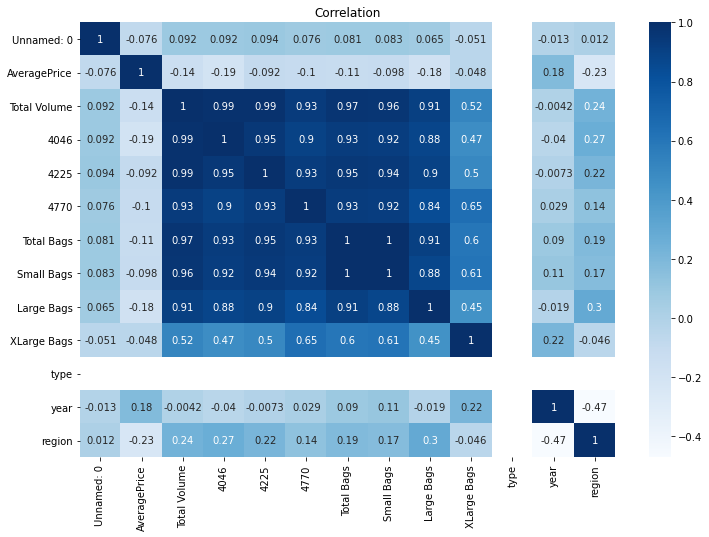

In [12]:
# Correlation using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [13]:
df.drop("AveragePrice",axis=1,inplace=True)
df.drop("year",axis=1,inplace=True)

df.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,0,2015-12-27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1,2015-12-20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,2,2015-12-13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,3,2015-06-12,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,4,2015-11-29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


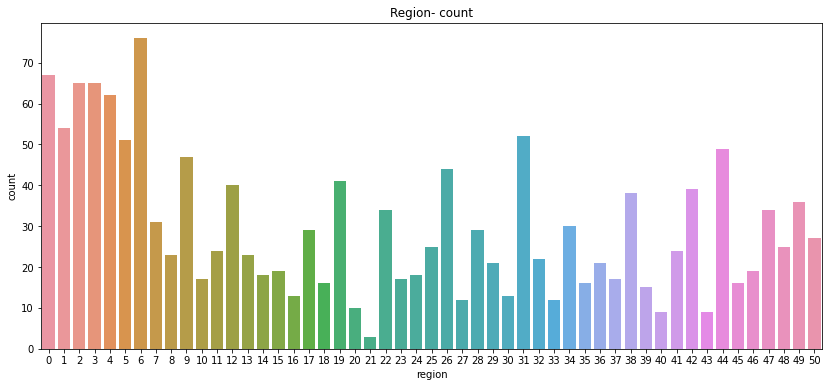

In [14]:
# Univariate analysis - target variable

plt.figure(figsize=(14,6))
sns.countplot(x=df["region"])
plt.title("Region- count")
plt.show()

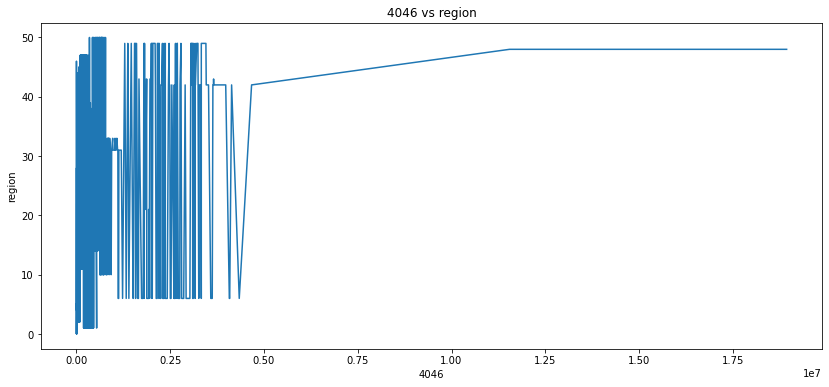

In [15]:
# Bivariate analysis

plt.figure(figsize=(14,6))
sns.lineplot(x=df["4046"],y=df["region"])
plt.title("4046 vs region")
plt.show()


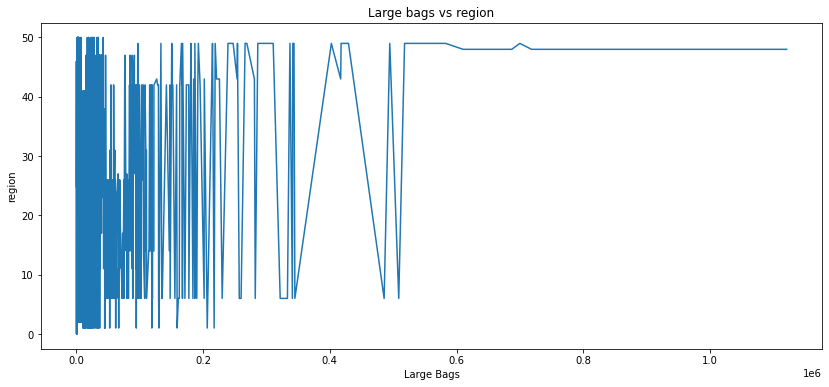

In [16]:
plt.figure(figsize=(14,6))
sns.lineplot(x=df["Large Bags"],y=df["region"])
plt.title("Large bags vs region")
plt.show()


In [17]:
df = df.set_index(df["Date"])
df.drop("Date",axis=1,inplace=True)
df.head()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
2015-12-20,1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2015-12-13,2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
2015-06-12,3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
2015-11-29,4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0


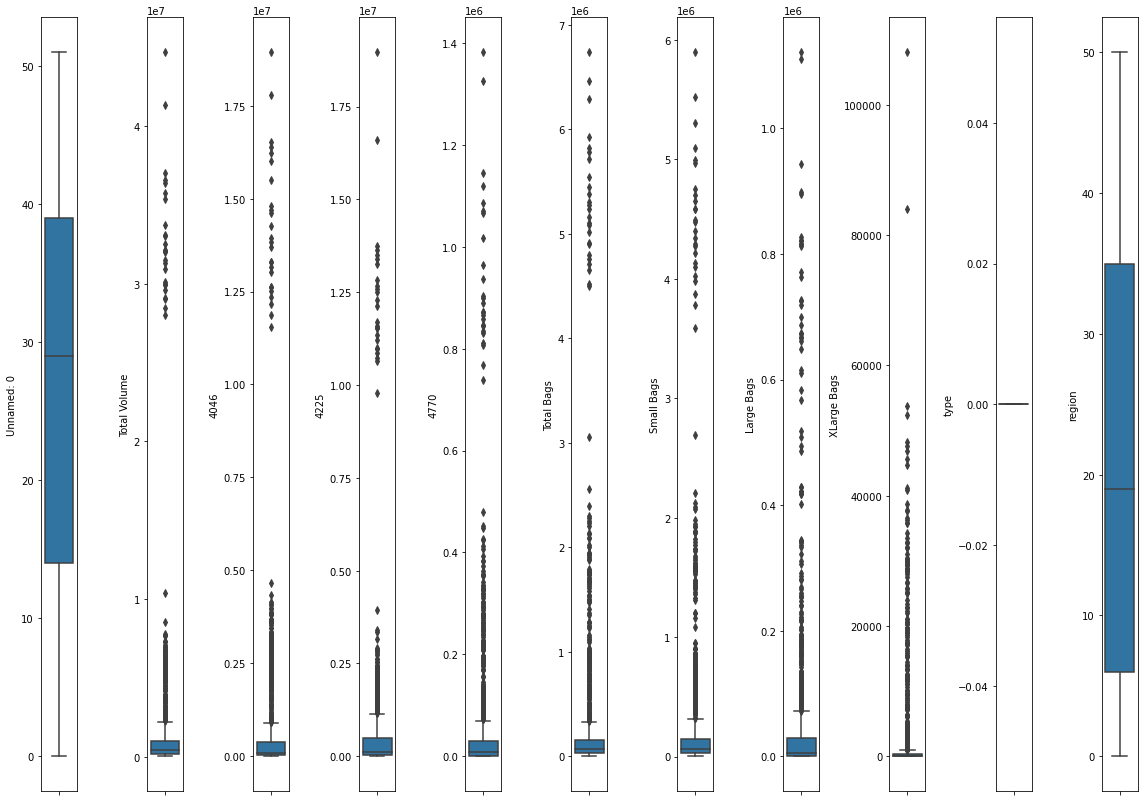

In [18]:
# Checking for outliers

collist = df.columns.values
ncol = 11
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

In [19]:
df.describe()

,Unnamed: 0,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000
mean,26.995386,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,21.196440
std,14.848287,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,16.132398
min,0.000000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,0.000000
25%,14.000000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,6.000000
50%,29.000000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,19.000000
75%,39.000000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,35.000000
max,51.000000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,50.000000


In [20]:
# Skewness

df.skew()

Unnamed: 0     -0.234824
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
region          0.288146
dtype: float64

In [21]:
for col in df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    df[col]= np.log(df[col]+1)
    
df.skew()

Unnamed: 0     -0.234824
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
region          0.288146
dtype: float64

In [22]:
for col in df[['Total Volume','Total Bags','Small Bags','XLarge Bags']]:
    df[col]= np.log(df[col]+1)

df.skew()

Unnamed: 0     -0.234824
Total Volume    0.442500
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.368284
Small Bags      0.409053
Large Bags     -0.912766
XLarge Bags     0.348073
type            0.000000
region          0.288146
dtype: float64

In [23]:
# Splitting independent variables and target

x = df.drop('region',axis=1)
print(x.head())
y = df[['region']]
print("\n")
print(y.head())

            Unnamed: 0  Total Volume      4046       4225      4770  \
Date                                                                  
2015-12-27           0      2.490752  6.944801  10.905146  3.895080   
2015-12-20           1      2.477619  6.515127  10.706381  4.083115   
2015-12-13           2      2.540051  6.679222  11.600485  4.879007   
2015-06-12           3      2.507737  7.032624  11.184108  4.298373   
2015-11-29           4      2.471515  6.848515  10.688288  4.340944   

            Total Bags  Small Bags  Large Bags  XLarge Bags  type  
Date                                                               
2015-12-27    2.309643    2.308573    4.545951          0.0     0  
2015-12-20    2.318433    2.317417    4.589955          0.0     0  
2015-12-13    2.303117    2.301843    4.645736          0.0     0  
2015-06-12    2.268791    2.266380    4.903495          0.0     0  
2015-11-29    2.275201    2.271857    5.291746          0.0     0  


            region
Date 

In [24]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.81868,-1.444206,-1.828162,-0.567524,-1.810613,-1.853603,-1.679192,-0.966743,-0.90242,0.0
1,-1.75131,-1.575367,-2.012069,-0.684233,-1.737594,-1.772639,-1.599620,-0.953861,-0.90242,0.0
2,-1.68394,-0.951829,-1.941834,-0.159241,-1.428526,-1.913718,-1.739733,-0.937531,-0.90242,0.0
3,-1.61657,-1.274562,-1.790572,-0.403726,-1.654003,-2.229923,-2.058774,-0.862073,-0.90242,0.0
4,-1.54920,-1.636328,-1.869374,-0.694856,-1.637471,-2.170878,-2.009503,-0.748414,-0.90242,0.0


In [25]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = [GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.9455894476504534
accuracy score of GaussianNB() is
0.930921052631579
[[ 8  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12
           3       0.92      1.00      0.96        12
           4       1.00      0.67      0.80         6
           5       0.89      1.00      0.94         8
           6       0.89      1.00      0.94        17
           7       1.00      0.67      0.80         9
           8       1.00      1.00      1.00         7
           9       0.90      1.00      0.95         9
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        10
          13    

In [29]:
# Gridsearch cv on SVC

from sklearn.model_selection import GridSearchCV

svc = SVC()
p = {'kernel':['linear', 'poly', 'rbf'], 'gamma':['scale','auto']}
a = GridSearchCV(svc,p)
a.fit(x,y)
a.best_params_

{'gamma': 'scale', 'kernel': 'linear'}

In [30]:
# SVC after hyperparameter tuning

svc = SVC(kernel='linear') #gamma=scale is default
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
pred=svc.predict(x_test)
print("Accuracy score of", svc ,"is")
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
# Svc after hyperparameter tuning has higher accuracy score than gaussianNB, so we continue with this model

0.9769167353668591
Accuracy score of SVC(kernel='linear') is
0.9473684210526315
[[ 9  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       0.71      0.83      0.77         6
           5       1.00      1.00      1.00         8
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         7
           9       0.90      1.00      0.95         9
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        10
       

In [31]:
# cross_val_score

from sklearn.model_selection import cross_val_score

print("Cross_val_score for",svc ,'is ',cross_val_score(svc,x,y,cv=5).mean())

Cross_val_score for SVC(kernel='linear') is  0.9189291297550808


In [32]:
# saving the model

import joblib

joblib.dump(svc,"svc_avocado_region.pkl")

['svc_avocado_region.pkl']

# Average price - regression problem

In [33]:
df1 = pd.read_csv("Avocado.csv",parse_dates=["Date"])
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [34]:
# There are no missing/null values in the dataset

In [35]:
# Converting categorical to numerical data - i.e type and region

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df1[["type","region"]] = df1[["type","region"]].apply(label_encoder.fit_transform)
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [36]:
# describe

df1.describe()
# maximum price is 1.68

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


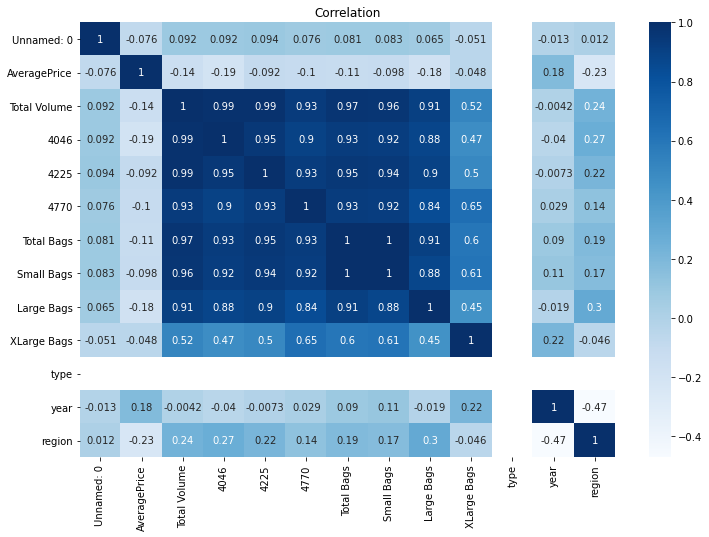

In [37]:
# Correlation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title("Correlation")
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.show()

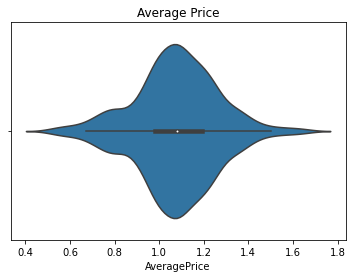

In [38]:
# Univariate analysis - target

sns.violinplot(x=df1["AveragePrice"])
plt.title("Average Price")
plt.show()

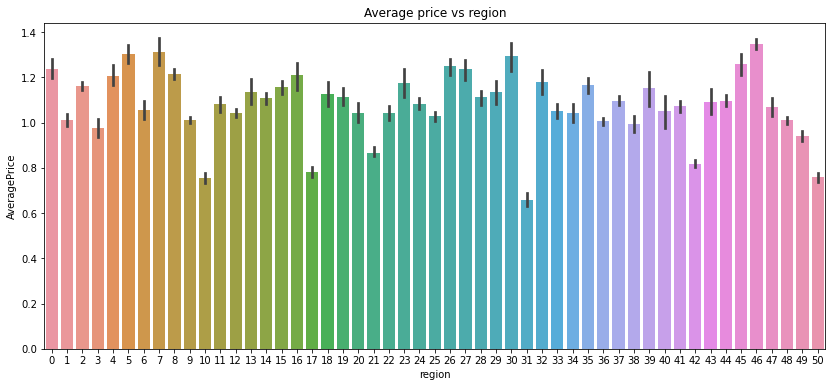

In [39]:
# Bivariate analysis

plt.figure(figsize=(14,6))
sns.barplot(x=df1["region"],y=df1["AveragePrice"])
plt.title("Average price vs region")
plt.show()

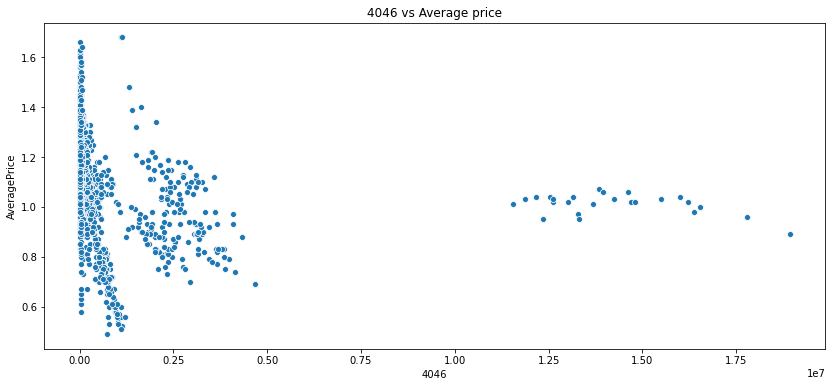

In [40]:
# Bivariate analysis

plt.figure(figsize=(14,6))
sns.scatterplot(x=df1["4046"],y=df1["AveragePrice"])
plt.title("4046 vs Average price")
plt.show()

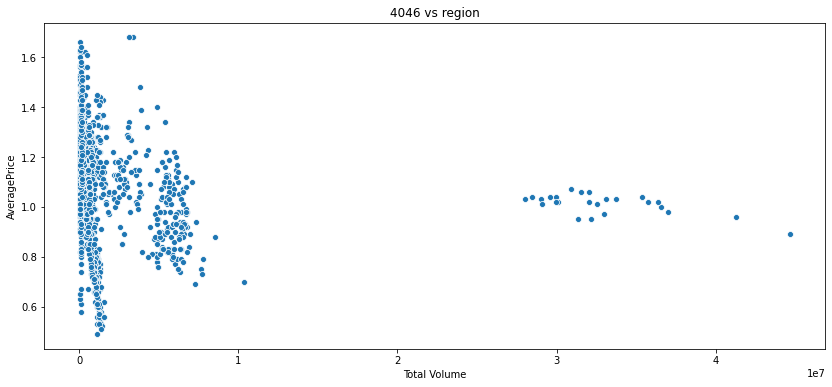

In [41]:
# Bivariate analysis

plt.figure(figsize=(14,6))
sns.scatterplot(x=df1["Total Volume"],y=df1["AveragePrice"])
plt.title("4046 vs region")
plt.show()

In [42]:
df1 = df1.set_index(df1["Date"])
df1.drop("Date",axis=1,inplace=True)
df1.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
2015-06-12,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [43]:
# Skewness

df1.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [44]:
for col in df1[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    df1[col]= np.log(df1[col]+1)
    
df1.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [45]:
for col in df1[['Total Volume','Total Bags','Small Bags','XLarge Bags']]:
    df1[col]= np.log(df1[col]+1)

df1.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    0.442500
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.368284
Small Bags      0.409053
Large Bags     -0.912766
XLarge Bags     0.348073
type            0.000000
year            1.828332
region          0.288146
dtype: float64

In [46]:
# Splitting independent variables and target

x = df1.drop('AveragePrice',axis=1)
print(x.head())
y = df1[['AveragePrice']]
print("\n")
print(y.head())

            Unnamed: 0  Total Volume      4046       4225      4770  \
Date                                                                  
2015-12-27           0      2.490752  6.944801  10.905146  3.895080   
2015-12-20           1      2.477619  6.515127  10.706381  4.083115   
2015-12-13           2      2.540051  6.679222  11.600485  4.879007   
2015-06-12           3      2.507737  7.032624  11.184108  4.298373   
2015-11-29           4      2.471515  6.848515  10.688288  4.340944   

            Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
Date                                                                      
2015-12-27    2.309643    2.308573    4.545951          0.0     0  2015   
2015-12-20    2.318433    2.317417    4.589955          0.0     0  2015   
2015-12-13    2.303117    2.301843    4.645736          0.0     0  2015   
2015-06-12    2.268791    2.266380    4.903495          0.0     0  2015   
2015-11-29    2.275201    2.271857    5.291746      

In [47]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.81868,-1.444206,-1.828162,-0.567524,-1.810613,-1.853603,-1.679192,-0.966743,-0.90242,0.0,-0.441008,-1.314338
1,-1.75131,-1.575367,-2.012069,-0.684233,-1.737594,-1.772639,-1.599620,-0.953861,-0.90242,0.0,-0.441008,-1.314338
2,-1.68394,-0.951829,-1.941834,-0.159241,-1.428526,-1.913718,-1.739733,-0.937531,-0.90242,0.0,-0.441008,-1.314338
3,-1.61657,-1.274562,-1.790572,-0.403726,-1.654003,-2.229923,-2.058774,-0.862073,-0.90242,0.0,-0.441008,-1.314338
4,-1.54920,-1.636328,-1.869374,-0.694856,-1.637471,-2.170878,-2.009503,-0.748414,-0.90242,0.0,-0.441008,-1.314338


In [48]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=52)

In [50]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [51]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(x_train,y_train)
    print(m, "model")
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print("\n")

LinearRegression() model
0.3853599159134061
0.3559461465232012
0.023696348727921077


SVR() model
0.8249263613948994
0.8079857810460023
0.007064682353021948


DecisionTreeRegressor() model
1.0
0.664183523512977
0.012355526315789473


KNeighborsRegressor() model
0.8496406728291608
0.7977542391480378
0.007441126315789473


Lasso() model
0.0
-0.001389257726116977
0.036843610103990974


Ridge() model
0.3851648202141451
0.3559996449237831
0.023694380388239962


ElasticNet() model
0.0
-0.001389257726116977
0.036843610103990974




In [52]:
# Gridsearch cv on svr

svr = SVR()
p = {'kernel':['linear', 'poly', 'rbf'], 'gamma':['scale','auto']}
a = GridSearchCV(svr,p)
a.fit(x,y)
a.best_params_


{'gamma': 'auto', 'kernel': 'rbf'}

In [53]:
# svr with above parameters

svr = SVR(kernel='rbf',gamma='auto')

svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
pred=svr.predict(x_test)
print("r2 ", r2_score(y_test,pred))
print("mean squared error " ,mean_squared_error(y_test,pred))
print("Cross_val_score for",svr ,'is ',cross_val_score(svr,x,y,cv=5).mean())

0.819345841146772
r2  0.8038577507056925
mean squared error  0.007216562892165313
Cross_val_score for SVR(gamma='auto') is  0.33529770005162496


In [54]:
# Ensemble - adaboost with svr

from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor(base_estimator=svr)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print("r2 ", r2_score(y_test,pred))
print("mean squared error " ,mean_squared_error(y_test,pred))
print("Cross_val_score for",ad ,'is ',cross_val_score(ad,x,y,cv=5).mean())

r2  0.8195540642057215
mean squared error  0.006639056342935636
Cross_val_score for AdaBoostRegressor(base_estimator=SVR(gamma='auto')) is  0.1981732377034612


In [55]:
# Saving the model

joblib.dump(ad,"ad_avocado_average_price.pkl")

['ad_avocado_average_price.pkl']